<a href="https://colab.research.google.com/github/WiktoriaGnojek23/DATA-602/blob/main/Final_Project_DATA_602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drug Use and Associated Risk Factors

"This dataset was extracted from the 2019 National Survey on Drug Use and Health, which is an annual survey (starting from 1971) that collects data regarding drug usage and mental health issues in the United States. The survey is run and maintained by the Substance Abuse and Mental Health Services Administration (SAMHSA) –a federal government agency that specializes in behavioral health and research. For more information on the survey (i.e., sampling methods, etc.), please visit this page. The original dataset (as well as datasets from surveys performed in other years) can be retrieved here.

This subset contains 16 categorical features of 56,136 observations, and was originally extracted to be used for a college data analysis project that sought to determine the influence (if any) certain risk factors have on drug usage. The purpose of creating this subset was to simplify moving the dataset around, as well as working with the dataset in general (e.g., less cryptic feature names, etc.) The subset is now offered as is to other students, hobbyists, etc. for practice.

The variables in this data set are substances that survey participants have admitted to using in their past (e.g., cocaine, heroin, meth, etc.), as well as associated risk factors that may influence whether or not an individual engages in drug use (e.g., income bracket, education, sex, etc.). Non-illicit drugs such as alcohol, marijuana*, and pain relief medicine were also of particular interest in the analysis project. Because these substances are often characterized as “gateways” to illicit drug use, it may prove interesting to the analyst to discern how usage of these substances affects the risk of using illicit substances as well."



Codebook; https://github.com/WiktoriaGnojek23/DATA-602/blob/main/DRUG%20USE%20AND%20ASSOCIATED%20RISK%20FACTORS%20CODEBOOK.pdf

Research Question; Can we predict substance abuse based on specific risk factors?

Justification; I currently work for a non-profit that supports those who are struggling with a loved one who suffers with substance abuse. 

Data Sources; I found the data set on Kaggle, https://www.kaggle.com/datasets/ciphernine/drugs-and-risk-factors. 

In [205]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

## importing the data set
url = 'https://raw.githubusercontent.com/WiktoriaGnojek23/DATA-602/main/drugs_and_riskfactors%5B2%5D.csv'
df = pd.read_csv(url)

## print intial lines of data set
print(df.head(10))

#summary statistics
df.info()

# relevant information
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))


   alcohol  cigarettes  cocaine  crack  heroin  marijuana  meth  \
0        1           1        0      0       0          0     0   
1        1           0        0      0       0          0     0   
2        1           1        0      0       0          1     0   
3        1           0        0      0       0          0     0   
4        1           0        0      0       0          0     0   
5        1           1        0      0       0          1     0   
6        1           0        0      0       0          1     0   
7        1           1        0      0       0          0     0   
8        0           0        0      0       0          0     0   
9        0           0        0      0       0          0     0   

   pain_relievers  age  education  father  mother  income  race  sex  \
0               1    4          4       4       4       4     1    1   
1               1    6          4       4       4       4     5    2   
2               1    3          4       4     

Data Wrangling

In [206]:
# Drop missing values
df = df.dropna()
# Rename columns
df = df.rename(columns={'age': 'Participants Age', 'education': 'Participants Education', 'father': 'Father Present', 'mother': 'Mother Present', 'income': 'Participants Income','race': 'Participants Race', 'sex': 'Participants Sex'})
print(df.head(10))

   alcohol  cigarettes  cocaine  crack  heroin  marijuana  meth  \
0        1           1        0      0       0          0     0   
1        1           0        0      0       0          0     0   
2        1           1        0      0       0          1     0   
3        1           0        0      0       0          0     0   
4        1           0        0      0       0          0     0   
5        1           1        0      0       0          1     0   
6        1           0        0      0       0          1     0   
7        1           1        0      0       0          0     0   
8        0           0        0      0       0          0     0   
9        0           0        0      0       0          0     0   

   pain_relievers  Participants Age  Participants Education  Father Present  \
0               1                 4                       4               4   
1               1                 6                       4               4   
2               1        

Visualizations - Below you will find correlation analysis run to determine risk factor correlation to the use of a substance. 

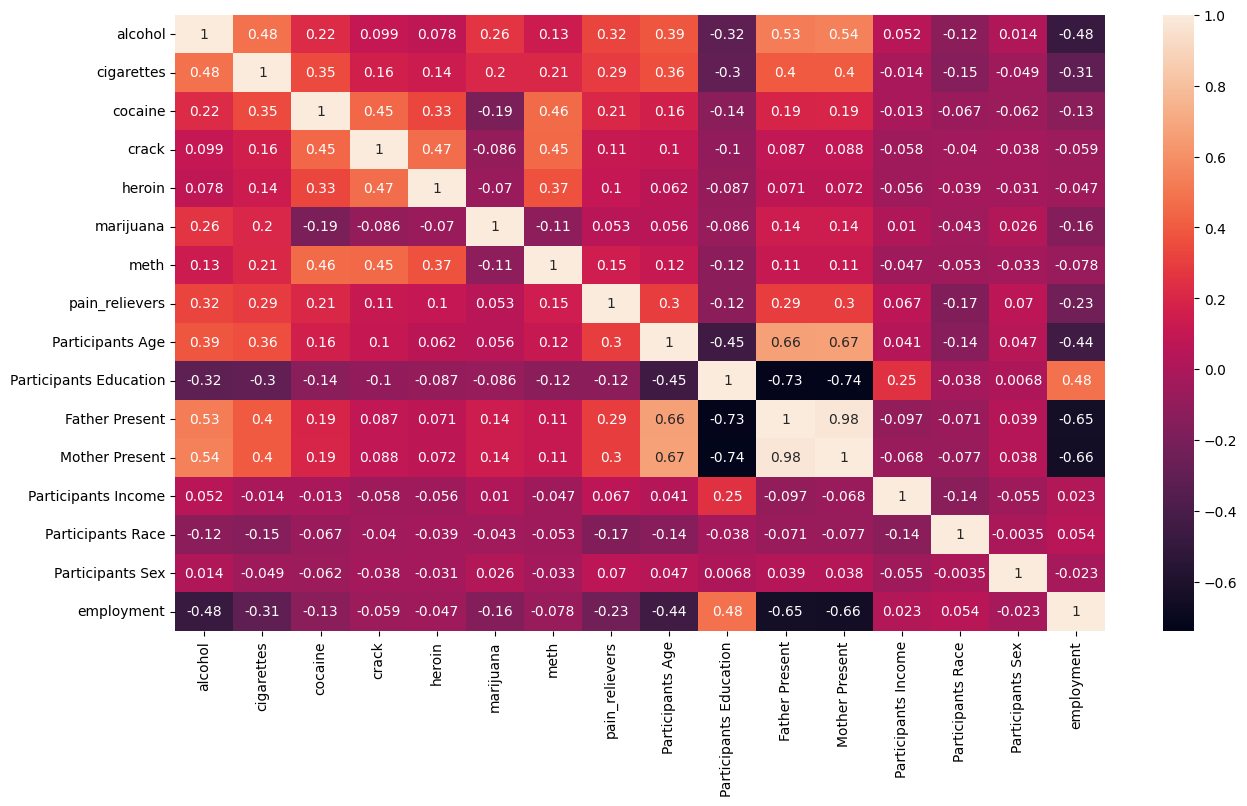

In [207]:
## correlation visualization
c_matrix = df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(c_matrix, annot=True)
plt.show()

1 means that there is a strong positive correlation between the two variables 

-1 means that there is a strong negative correlation

0 means that there is no linear correlation between the variables.

A few graphs that compare variables

In [208]:
# data wrangling, filtering 
df['employment'] = df['employment'].replace({1: 'Full-Time', 2: 'Part-Time', 3: 'Unemployed', 4: 'Other', 99: 'Under Age'})
# filter by only those who say they consume alcohol
df[df['alcohol'] == 1]

# Count
alcohol_counts = df['employment'].value_counts().reset_index()
alcohol_counts.columns = ['Participants Employment', 'Alcohol Consumption Count']

# Create the bar graph
fig = px.bar(alcohol_counts, x='Participants Employment', y='Alcohol Consumption Count', title='Bar Graph of Participants Employment vs. Alcohol Consumption')

# Show the bar graph
fig.show()

# data wrangling, filtering 
df['Participants Sex'] = df['Participants Sex'].replace({1: 'Male', 2: 'Female'})
# filter by only those who say they consume heroin
df[df['heroin'] == 1]

# Count
heroin_counts = df['Participants Sex'].value_counts().reset_index()
heroin_counts.columns = ['Participants Sex', 'Heroin Consumption Count']

# Create the bar graph
fig = px.bar(heroin_counts, x='Participants Sex', y='Heroin Consumption Count', title='Bar Graph of Participants Sex vs Heroin Consumption')

# Show the bar graph
fig.show()

# data wrangling, filtering 
df['Participants Race'] = df['Participants Race'].replace({1: 'White', 2: 'Black', 3: 'Native American', 4: 'Pacific Islander', 5: 'Asian', 6: 'Multi-Racial', 7: 'Hispanic'})
# filter by only those who say they consume meth
df[df['meth'] == 1]

# Count
meth_counts = df['Participants Race'].value_counts().reset_index()
meth_counts.columns = ['Participants Race', 'Meth Consumption Count']

# Create the bar graph
fig = px.bar(meth_counts, x='Participants Race', y='Meth Consumption Count', title='Bar Graph of Participants Race vs. Meth Consumption')

# Show the bar graph
fig.show()

Conclusion

We can conclude multiple correlations using the correlation matrix as well as the bar graphs. Upon reviewing the bar graphs, it seems that those who consume alcohol are typically employed full time. As for heroin, females are more likely to consume the substance in comparison to males, but not by much. Meth is most commonly consumed by those we identify racially as white. 